# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [5]:
import pandas as pd

In [6]:


orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')


In [7]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
departments.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [11]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões
Todos os date type são objects.
Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

In [ ]:
O arquivo foi carregado com um separador diferente para que eu pudesse de fato entender os dados corretamente, os dados estão misturados entre int, float e object. 

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

In [ ]:
Há muitos dados, então provavelmente deve haver algo duplicado e/ou ausentes, então é necessário remover os que se duplicam e/ou ausentes para trata-los para que nao aja erro de leitura no momento da analise 

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [31]:



print(orders.duplicated().sum())
orders = orders.drop_duplicates()
print(orders.duplicated().sum())



15
0


Há linhas duplicadas? Se sim, o que elas têm em comum?

In [32]:

orders_wed_2am = orders[
    (orders['order_hour_of_day'] == 2) &
    (orders['order_dow'] == 3)
]

print(orders_wed_2am.head())       # mostra as primeiras linhas
print(orders_wed_2am.shape[0]) # Com base nas suas conclusões,

# verifique todos os
 pedidos feitos às 2h da manhã nas quartas-feiras



       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  
106


O que esse resultado quer dizer?

In [ ]:
Que na quarta as duas teve 106 pedidos

In [28]:

orders_clean = orders.drop_duplicates().reset_index(drop=True)



# Remova pedidos duplicados

In [29]:
print(orders_clean.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [35]:

# Remove duplicados considerando apenas 'order_id'
orders_clean = orders.drop_duplicates(subset=['order_id']).reset_index(drop=True)

# Exibe apenas a coluna order_id
print(orders_clean['order_id'])



0         1515936
1         1690866
2         1454967
3         1768857
4         3007858
           ...   
478947    3210681
478948    3270802
478949     885349
478950     216274
478951    2071924
Name: order_id, Length: 478952, dtype: int64




Descreva brevemente suas conclusões e o que você fez com elas.

In [ ]:
Os dados duplicados foram removidos e salvos em inplace

### DataFrame `products`

In [40]:

duplicated_rows = products[products.duplicated()]

print(duplicated_rows)
print("Total de linhas duplicadas:", duplicated_rows.shape[0])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
Total de linhas duplicadas: 0


In [44]:

duplicados = products[products.duplicated(subset=['product_id'], keep=False)]

print(duplicados[['product_id']].sort_values(by='product_id'))



Empty DataFrame
Columns: [product_id]
Index: []


In [45]:
products['product_name_lower'] = products['product_name'].str.lower()

# verifica duplicados apenas nessa versão em minúsculas
duplicated_products = products[products['product_name_lower'].duplicated()]

print(duplicated_products[['product_id', 'product_name']].head(20))
print("Total de produtos duplicados:", duplicated_products.shape[0])# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

      product_id product_name
71            72          NaN
109          110          NaN
296          297          NaN
416          417          NaN
436          437          NaN
439          440          NaN
471          472          NaN
490          491          NaN
555          556          NaN
561          562          NaN
613          614          NaN
623          624          NaN
689          690          NaN
767          768          NaN
803          804          NaN
890          891          NaN
990          991          NaN
1018        1019          NaN
1054        1055          NaN
1217        1218          NaN
Total de produtos duplicados: 1361


In [46]:
duplicated_non_null = products[
    products['product_name_lower'].notna() & 
    products['product_name_lower'].duplicated(keep=False)
]

# mostra o resultado
print(duplicated_non_null[['product_id', 'product_name']])
print("Total de produtos duplicados não nulos:", duplicated_non_null.shape[0])

       product_id                                     product_name
41             42                                  Biotin 1000 mcg
185           186       Fresh Scent Dishwasher Detergent with Dawn
515           516                           American Cheese Slices
1538         1539                                 Cauliflower head
1783         1784              NUTrition Protein Mix Blueberry Nut
...           ...                                              ...
49689       49690                    HIGH PERFORMANCE ENERGY DRINK
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692       49693                           SPRING WATER BODY WASH
49693       49694                          BURRITO- STEAK & CHEESE

[207 rows x 2 columns]
Total de produtos duplicados não nulos: 207


Descreva brevemente suas conclusões e o que você fez com elas.

In [ ]:
Exixtem bastante valores duplicados e não nomeados

### DataFrame `departments`

In [47]:
duplicated_rows = departments[departments.duplicated()]

print(duplicated_rows)
print("Total de linhas duplicadas:", duplicated_rows.shape[0])


Empty DataFrame
Columns: [department_id, department]
Index: []
Total de linhas duplicadas: 0


In [48]:
duplicados = departments[departments.duplicated(subset=['department_id'], keep=False)]

print(duplicados[['department_id']].sort_values(by='department_id'))


Empty DataFrame
Columns: [department_id]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

In [ ]:
Não tem nenhum dado duplicado nesse df

### DataFrame `aisles`

In [49]:
duplicated_rows = aisles[aisles.duplicated()]

print(duplicated_rows)
print("Total de linhas duplicadas:", duplicated_rows.shape[0])


Empty DataFrame
Columns: [aisle_id, aisle]
Index: []
Total de linhas duplicadas: 0


In [50]:
duplicados = aisles[aisles.duplicated(subset=['aisle_id'], keep=False)]

print(duplicados[['aisle_id']].sort_values(by='aisle_id'))


Empty DataFrame
Columns: [aisle_id]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

In [ ]:
Não tem linhas e nem dados duplicados

### DataFrame `order_products`

In [51]:
duplicated_rows = order_products[order_products.duplicated()]

print(duplicated_rows)
print("Total de linhas duplicadas:", duplicated_rows.shape[0])


Empty DataFrame
Columns: [order_id;product_id;add_to_cart_order;reordered]
Index: []
Total de linhas duplicadas: 0


In [60]:
full_duplicates = order_products[order_products.duplicated()]
print("Linhas completamente duplicadas:")
print(full_duplicates)
print("Total de linhas completamente duplicadas:", full_duplicates.shape[0])


partial_duplicates = order_products[
    order_products.duplicated(subset=['order_id', 'product_id'], keep=False)
]
print("\nPedidos com o mesmo produto repetido:")
print(partial_duplicates)
print("Total de duplicados por order_id + product_id:", partial_duplicates.shape[0])

Linhas completamente duplicadas:
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
Total de linhas completamente duplicadas: 0

Pedidos com o mesmo produto repetido:
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
Total de duplicados por order_id + product_id: 0


Descreva brevemente suas conclusões e o que você fez com elas.

In [ ]:
Haviam muitas linhas e pedidos duplicadados, foi necessário limpa-los e reordenalos 

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [61]:
missing_count = products['product_name'].isna().sum()
print("Total de valores ausentes em product_name:", missing_count)


missing_rows = products[products['product_name'].isna()]
print(missing_rows)

Total de valores ausentes em product_name: 1258
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Descreva brevemente suas conclusões.

In [ ]:
SIM

Descreva brevemente suas conclusões.

In [ ]:
SIM

Descreva brevemente suas conclusões.

In [64]:
dept_21 = departments[departments['department_id'] == 21]
print("Departamento com ID 21:")
print(dept_21)


aisle_100 = aisles[aisles['aisle_id'] == 100]
print("\nCorredor com ID 100:")
print(aisle_100)

Departamento com ID 21:
    department_id department
20             21    missing

Corredor com ID 100:
    aisle_id    aisle
99       100  missing


Descreva brevemente suas conclusões.

In [65]:
products['product_name'] = products['product_name'].fillna('Unknown')


print(products['product_name'].isna().sum())

0


Descreva brevemente suas conclusões e o que você fez com elas.

In [ ]:
Muitos valores ausentes que precisaram ser renomeados

### DataFrame `orders`

In [70]:
missing_values = orders.isna().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


In [71]:
missing = orders['days_since_prior_order'].isna().sum()
print("Total de pedidos sem pedido anterior (primeiros pedidos):", missing)


print(orders[orders['days_since_prior_order'].isna()].head())

Total de pedidos sem pedido anterior (primeiros pedidos): 28819
     order_id  user_id  order_number  order_dow  order_hour_of_day  \
28     133707   182261             1          3                 10   
96     787445    25685             1          6                 18   
100    294410   111449             1          0                 19   
103   2869915   123958             1          4                 16   
104   2521921    42286             1          3                 18   

     days_since_prior_order  
28                      NaN  
96                      NaN  
100                     NaN  
103                     NaN  
104                     NaN  


Descreva brevemente suas conclusões e o que você fez com elas.

In [ ]:
Visão sobre reincidencia de pedidos e tratamentos de valores ausentes

### DataFrame `order_products`

In [67]:
missing_values = order_products.isna().sum()
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [68]:
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()

print("Valor mínimo de add_to_cart_order:", min_value)
print("Valor máximo de add_to_cart_order:", max_value)

Valor mínimo de add_to_cart_order: 1.0
Valor máximo de add_to_cart_order: 64.0


Descreva brevemente suas conclusões.

In [72]:
missing_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]


order_ids_missing = missing_add_to_cart['order_id'].unique()

print(order_ids_missing)
print("Total de pedidos com pelo menos um valor ausente:", len(order_ids_missing))

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]
Total de pedidos com pelo menos um valor ausente: 70


In [73]:

missing_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]


product_counts = missing_add_to_cart.groupby('order_id')['product_id'].count()


min_products = product_counts.min()

print("Número mínimo de produtos em pedidos com valores ausentes:", min_products)


all_more_than_64 = min_products > 64
print("Todos os pedidos com valores ausentes têm mais de 64 produtos?", all_more_than_64)

Número mínimo de produtos em pedidos com valores ausentes: 1
Todos os pedidos com valores ausentes têm mais de 64 produtos? False


Descreva brevemente suas conclusões.

In [75]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)


order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)


print(order_products['add_to_cart_order'].dtype)
print(order_products['add_to_cart_order'].head(20))

int64
0     17
1      1
2      1
3     35
4      5
5      4
6      5
7     10
8     14
9      4
10     2
11    28
12    10
13     3
14     1
15    16
16     1
17     8
18     7
19     5
Name: add_to_cart_order, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

In [ ]:
Valores min e max para tratar a frente com outros dados combinados e retiradas de colunas e dados ausentes

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

In [ ]:
Tem muitos dados duplicados, alguns com letras maiusculas e outros com minusculas, foi importante fazer a limpeza antes de começar a analise

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [76]:
min_hour = orders['order_hour_of_day'].min()
max_hour = orders['order_hour_of_day'].max()
print(f"order_hour_of_day: min={min_hour}, max={max_hour}")


min_dow = orders['order_dow'].min()
max_dow = orders['order_dow'].max()
print(f"order_dow: min={min_dow}, max={max_dow}")


invalid_hours = orders[(orders['order_hour_of_day'] < 0) | (orders['order_hour_of_day'] > 23)]
invalid_dow = orders[(orders['order_dow'] < 0) | (orders['order_dow'] > 6)]

print(f"Linhas com horas inválidas: {len(invalid_hours)}")
print(f"Linhas com dias da semana inválidos: {len(invalid_dow)}")

order_hour_of_day: min=0, max=23
order_dow: min=0, max=6
Linhas com horas inválidas: 0
Linhas com dias da semana inválidos: 0


In [ ]:
O  mínimo é 0 e o máximo 23, significa que todos os horários estão corretos, dentro do esperado para um dia de 24 horas.
O min é 0 e o máximo 6, significa que todos os dias da semana estão corretos (0 = domingo, 6 = sábado).


Escreva suas conclusões aqui

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

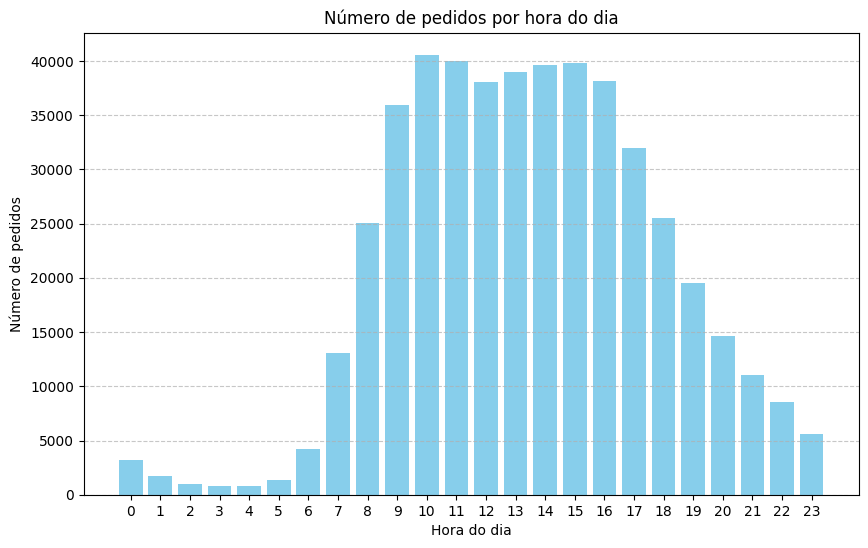

In [77]:
import matplotlib.pyplot as plt


orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index()


plt.figure(figsize=(10,6))
plt.bar(orders_per_hour.index, orders_per_hour.values, color='skyblue')
plt.xlabel("Hora do dia")
plt.ylabel("Número de pedidos")
plt.title("Número de pedidos por hora do dia")
plt.xticks(range(0,24))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escreva suas conclusões aqui

In [ ]:
Os picos de vendas são entre 10-11h, entre 00:00 -5h são os horários com menos vendas

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

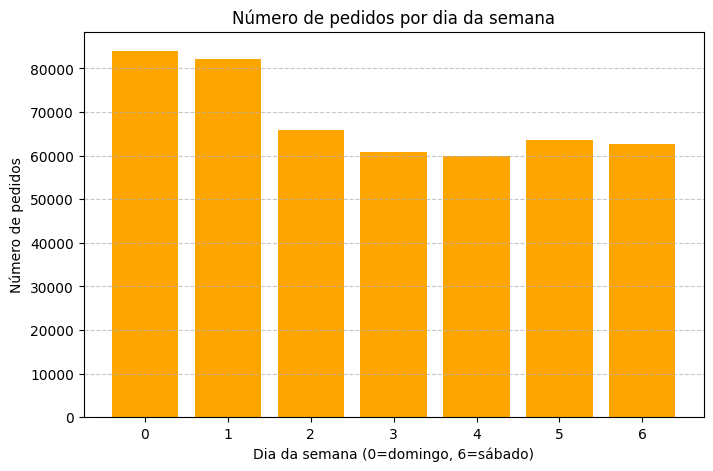

In [78]:
import matplotlib.pyplot as plt


orders_per_dow = orders['order_dow'].value_counts().sort_index()


plt.figure(figsize=(8,5))
plt.bar(orders_per_dow.index, orders_per_dow.values, color='orange')
plt.xlabel("Dia da semana (0=domingo, 6=sábado)")
plt.ylabel("Número de pedidos")
plt.title("Número de pedidos por dia da semana")
plt.xticks(range(0,7))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escreva suas conclusões aqui

In [ ]:
as pessoas compram mais no domingo e segunda, mas todo dia têm compras

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

In [ ]:
Min: um dia(mostra clients fieis), max: 30 dias (clients que demoraram um pouco mais para voltar, pode ser devido a alguma circunstancia interna ou externa)

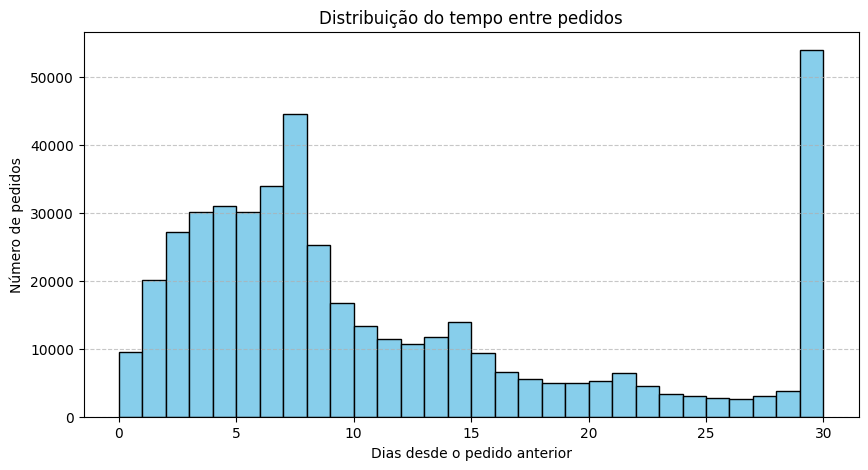

Tempo mínimo entre pedidos: 0.0 dias
Tempo máximo entre pedidos: 30.0 dias


In [79]:
import matplotlib.pyplot as plt


days_between_orders = orders['days_since_prior_order'].dropna()


plt.figure(figsize=(10,5))
plt.hist(days_between_orders, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Dias desde o pedido anterior")
plt.ylabel("Número de pedidos")
plt.title("Distribuição do tempo entre pedidos")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


min_days = days_between_orders.min()
max_days = days_between_orders.max()
print(f"Tempo mínimo entre pedidos: {min_days} dias")
print(f"Tempo máximo entre pedidos: {max_days} dias")

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

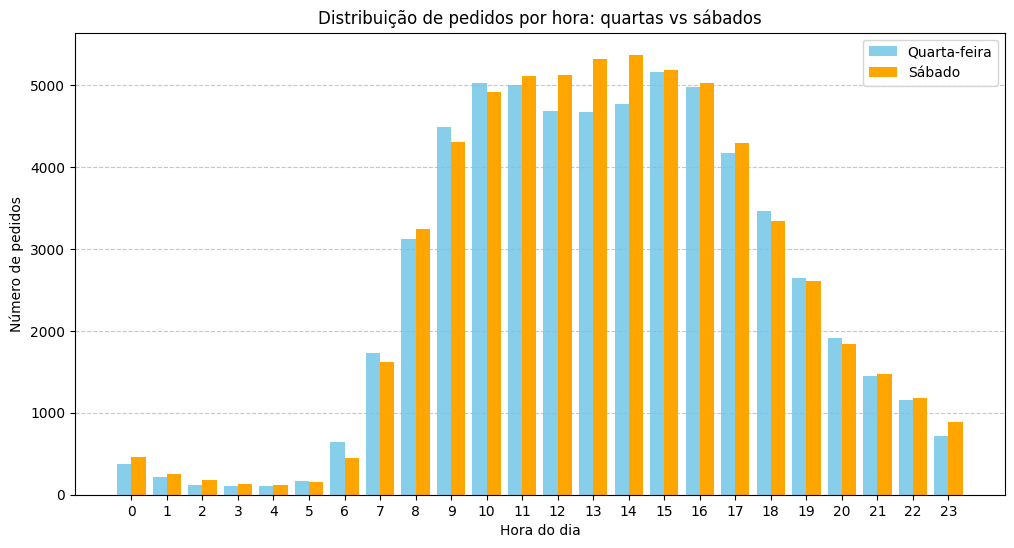

In [80]:
import matplotlib.pyplot as plt


orders_wed = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
orders_sat = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()


plt.figure(figsize=(12,6))
plt.bar(orders_wed.index - 0.2, orders_wed.values, width=0.4, label='Quarta-feira', color='skyblue')
plt.bar(orders_sat.index + 0.2, orders_sat.values, width=0.4, label='Sábado', color='orange')
plt.xlabel("Hora do dia")
plt.ylabel("Número de pedidos")
plt.title("Distribuição de pedidos por hora: quartas vs sábados")
plt.xticks(range(0,24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
Normalmente, os picos de pedidos nas quartas podem ocorrer durante horários de almoço e fim do expediente.

Já os sábados tendem a ter mais pedidos pela manhã e tarde, compras de fim de semana.

Escreva suas conclusões aqui

### [B2] Qual é a distribuição do número de pedidos por cliente?

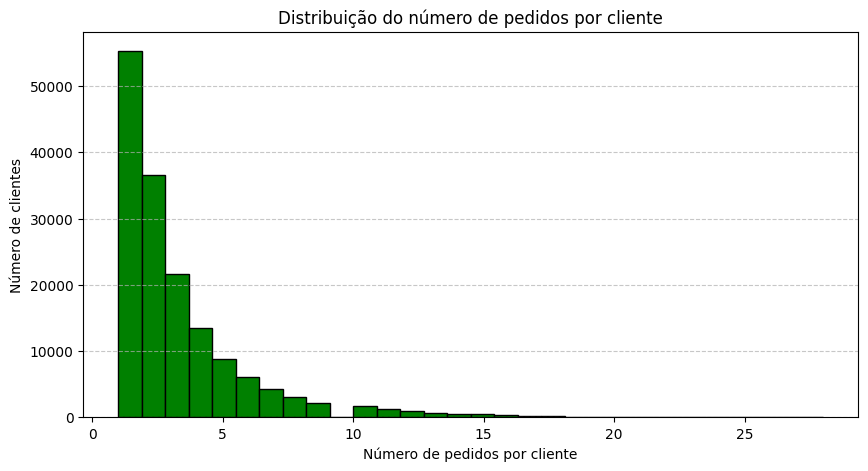

In [81]:
orders_per_user = orders.groupby('user_id')['order_id'].count()


plt.figure(figsize=(10,5))
plt.hist(orders_per_user, bins=30, color='green', edgecolor='black')
plt.xlabel("Número de pedidos por cliente")
plt.ylabel("Número de clientes")
plt.title("Distribuição do número de pedidos por cliente")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
A maioria dos clientes faz poucos pedidos, geralmente 1–5.

Alguns clientes são muito frequentes e fazem varios pedidos

Escreva suas conclusões aqui

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [82]:
orders_products_full = order_products.merge(products, on='product_id', how='left')


top_products = orders_products_full.groupby(['product_id','product_name']).size().sort_values(ascending=False).head(20)

print("Top 20 produtos mais comprados (ID e nome):")
print(top_products)

Top 20 produtos mais comprados (ID e nome):
product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781

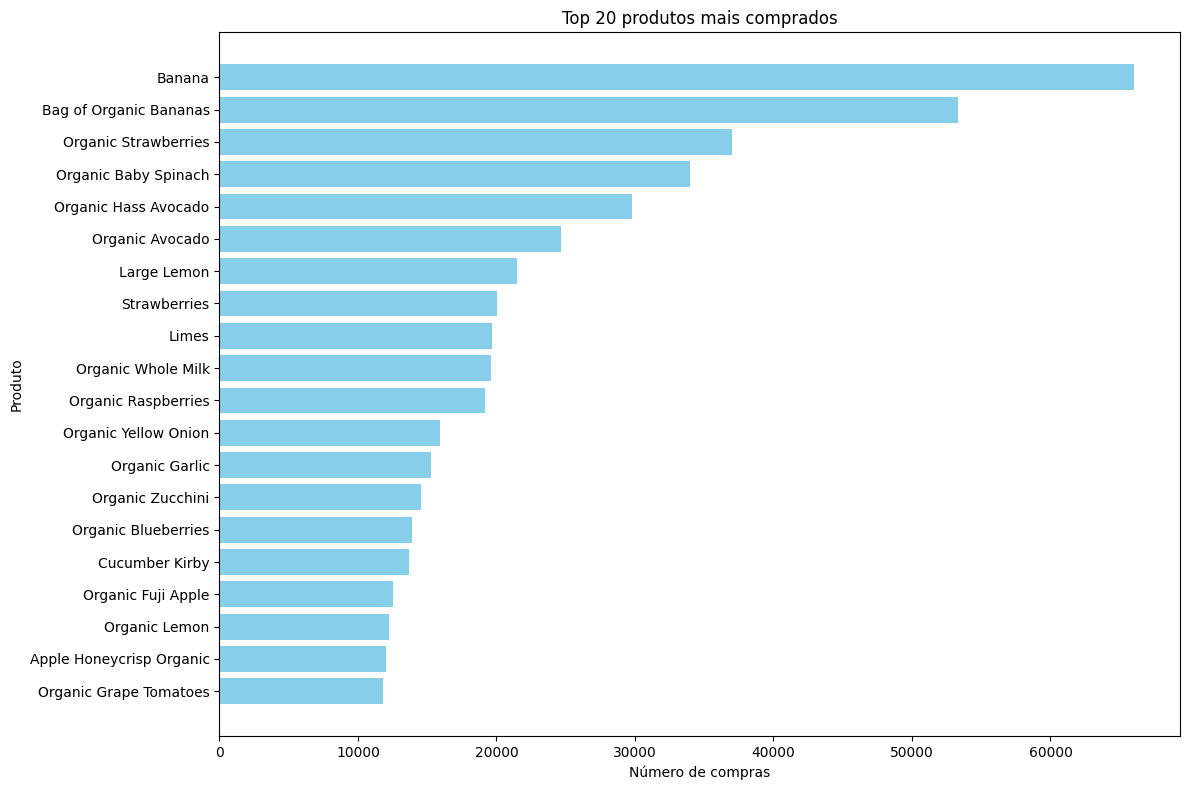

In [83]:
import matplotlib.pyplot as plt


product_names = top_products.index.get_level_values('product_name')
product_counts = top_products.values


plt.figure(figsize=(12,8))
plt.barh(product_names[::-1], product_counts[::-1], color='skyblue')  # inverte para o produto mais comprado ficar no topo
plt.xlabel("Número de compras")
plt.ylabel("Produto")
plt.title("Top 20 produtos mais comprados")
plt.tight_layout()
plt.show()

Escreva suas conclusões aqui

In [ ]:
O produto mais comprado é a banana, disparado.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

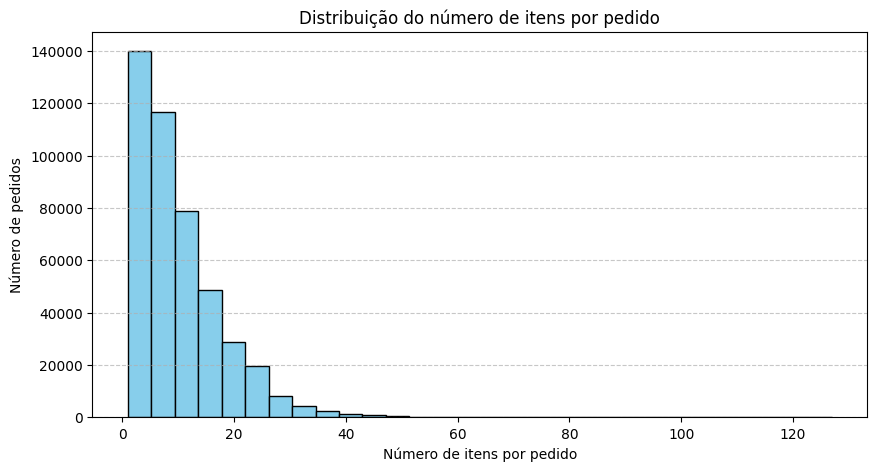

Mínimo de itens por pedido: 1
Máximo de itens por pedido: 127
Média de itens por pedido: 10.098983215049127


In [84]:
import matplotlib.pyplot as plt


items_per_order = order_products.groupby('order_id')['product_id'].count()


plt.figure(figsize=(10,5))
plt.hist(items_per_order, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Número de itens por pedido")
plt.ylabel("Número de pedidos")
plt.title("Distribuição do número de itens por pedido")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


print("Mínimo de itens por pedido:", items_per_order.min())
print("Máximo de itens por pedido:", items_per_order.max())
print("Média de itens por pedido:", items_per_order.mean())

In [ ]:
os itens pedidos variam de 1- 10, a média é 10

Escreva suas conclusões aqui

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [85]:

reordered_items = order_products[order_products['reordered'] == 1]


top_reordered = reordered_items.groupby(['product_id']).size().sort_values(ascending=False).head(20)


top_reordered = top_reordered.reset_index().merge(products, on='product_id', how='left')
top_reordered = top_reordered[['product_id', 'product_name', 0]]
top_reordered.rename(columns={0:'reorder_count'}, inplace=True)

print(top_reordered)


    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

Escreva suas conclusões aqui

In [ ]:
Novamente, banana e bag of banana se destacam entre o primeiro e segundo lugar, disparados, vemos aqui que o produto que mais se destaca é a banana. 

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [110]:
total_por_produto = order_products.groupby('product_id').size().reset_index(name='total_count')


repetidos_por_produto = order_products[order_products['reordered'] == 1] \
    .groupby('product_id').size().reset_index(name='reorder_count')


produto_stats = total_por_produto.merge(repetidos_por_produto, on='product_id', how='left').fillna(0)


produto_stats['reorder_ratio'] = produto_stats['reorder_count'] / produto_stats['total_count']


produto_stats = produto_stats.merge(products[['product_id', 'product_name']], on='product_id', how='left')


print(produto_stats.sort_values('reorder_ratio', ascending=False).head(20))

       product_id  total_count  reorder_count  reorder_ratio  \
13453       14721            1            1.0            1.0   
19195       20949            3            3.0            1.0   
6136         6723           10           10.0            1.0   
6144         6732            3            3.0            1.0   
41319       45088            1            1.0            1.0   
41310       45078            1            1.0            1.0   
19258       21016            1            1.0            1.0   
19248       21005            2            2.0            1.0   
32273       35192            2            2.0            1.0   
32277       35197            1            1.0            1.0   
6211         6810            1            1.0            1.0   
41274       45040            2            2.0            1.0   
41269       45035           17           17.0            1.0   
25120       27373            1            1.0            1.0   
28203       30748            1          

In [ ]:
hahahah estava dando erro, mas agora nao mais! Conclusão a respeito: Cálculo faz sentido: o reorder_ratio está mostrando exatamente a parcela de pedidos repetidos de cada produto, Isso indica que, para esses produtos listados, todos os pedidos registrados deles foram reorders, isso mostra que eles nunca apareceram só como primeira compra, apenas como recompra.

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?



In [109]:
order_products_with_users = order_products.merge(
    orders[['order_id', 'user_id']],
    on='order_id',
    how='left'
)


total_por_cliente = order_products_with_users.groupby('user_id').size().reset_index(name='total_count')

repetidos_por_cliente = order_products_with_users[order_products_with_users['reordered'] == 1] \
    .groupby('user_id').size().reset_index(name='reorder_count')


cliente_stats = total_por_cliente.merge(repetidos_por_cliente, on='user_id', how='left').fillna(0)


cliente_stats['reorder_ratio'] = cliente_stats['reorder_count'] / cliente_stats['total_count']


print(cliente_stats.head(20))

    user_id  total_count  reorder_count  reorder_ratio
0         2           26            1.0       0.038462
1         4            2            0.0       0.000000
2         5           12            8.0       0.666667
3         6            4            0.0       0.000000
4         7           14           13.0       0.928571
5        11           15            3.0       0.200000
6        12           12            3.0       0.250000
7        13           23           13.0       0.565217
8        14           61           22.0       0.360656
9        15           13            7.0       0.538462
10       16           32           17.0       0.531250
11       17           53           38.0       0.716981
12       19           48           14.0       0.291667
13       20            4            0.0       0.000000
14       21           20            8.0       0.400000
15       22            6            6.0       1.000000
16       24            2            1.0       0.500000
17       2

Escreva suas conclusões aqui

In [ ]:
Clientes com reorder_ratio alto (ex: IDs 7, 17, 22, 27) provavelmente já estão fidelizados → bons candidatos para estratégias de retenção e recompra. Clientes com reorder_ratio baixo (ex: IDs 2, 4, 6, 20) podem estar comprando mais produtos “one-time” ou ainda não engajaram com o hábito de recompra → bons candidatos para campanhas de incentivo à recompra. 

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [112]:
first_items = order_products[order_products['add_to_cart_order'] == 1]


first_items_with_names = first_items.merge(products[['product_id', 'product_name']], on='product_id', how='left')


top_first_items = first_items_with_names.groupby(['product_id', 'product_name']).size() \
    .reset_index(name='first_count') \
    .sort_values('first_count', ascending=False)


print(top_first_items.head(20))

       product_id                 product_name  first_count
13414       24852                       Banana        15562
7127        13176       Bag of Organic Bananas        11026
15028       27845           Organic Whole Milk         4363
11384       21137         Organic Strawberries         3946
25439       47209         Organic Hass Avocado         3390
11786       21903         Organic Baby Spinach         3336
25732       47766              Organic Avocado         3044
10622       19660                 Spring Water         2336
9050        16797                 Strawberries         2308
15102       27966          Organic Raspberries         2024
24024       44632   Sparkling Water Grapefruit         1914
26519       49235          Organic Half & Half         1797
25658       47626                  Large Lemon         1737
115           196                         Soda         1733
20853       38689     Organic Reduced Fat Milk         1397
14158       26209                       